# Library

In [1]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

# Dataset

In [2]:
folder_path = 'C:/Users/Aditya Rafi/Desktop/Dataset/DogsVSCats'
train_folder = folder_path + '/train'
val_folder = folder_path + '/val'

## Check Dog and Cat image

In [3]:
class_category = ['cat', 'dog']
print('-----------------------------TOTAL IMAGE-----------------------------------')
for data in ['train', 'val']:
    for cls in class_category:
        tot_img = len(os.listdir(folder_path+'/'+data+'/'+cls))
        print(f"Total '{data}' images for '{cls}' folder: {tot_img}")
    print('.........................................................................')  

-----------------------------TOTAL IMAGE-----------------------------------
Total 'train' images for 'cat' folder: 10000
Total 'train' images for 'dog' folder: 10000
.........................................................................
Total 'val' images for 'cat' folder: 2500
Total 'val' images for 'dog' folder: 2500
.........................................................................


In [4]:
cat_img = train_folder + '/cat/cat.0.jpg'
dog_img = train_folder+ '/dog/dog.5.jpg'

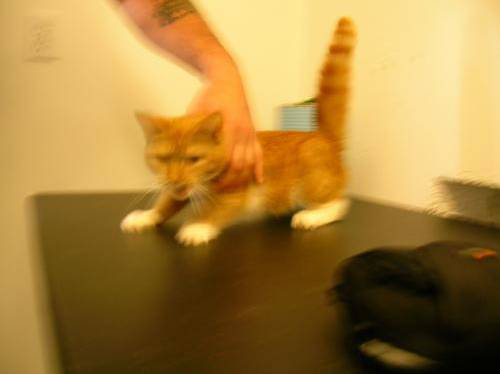

In [5]:
load_img(cat_img)

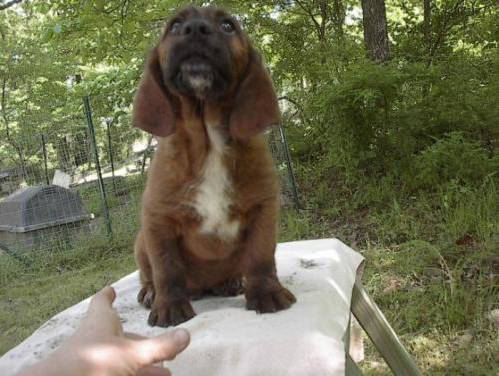

In [6]:
load_img(dog_img)

# Model

In [7]:
#---------layer----------#
## Input
inputs = keras.Input(shape=(150,150,3))
## Convlutional Layer
cov = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
## Max Pooling
max_pool = keras.layers.MaxPooling2D((2,2))(cov)
## Flatten
flat = keras.layers.Flatten()(max_pool)
## Dense Inner
inner = keras.layers.Dense(64, activation='relu')(flat)
## Output Dense
outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
## Model
model = keras.Model(inputs, outputs)

## Compile model
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# ANS Q2:

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

## Data Generator for Train and Val Data (Without Augmentation)

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(train_folder,
                                         target_size=(150, 150),
                                         class_mode='binary',
                                         batch_size=20)                                        

val_gen = ImageDataGenerator(rescale=1./255)
val_ds = val_gen.flow_from_directory(val_folder,
                                     target_size=(150, 150),
                                     class_mode='binary',
                                     batch_size=20)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Train Model

In [10]:
hist = model.fit(train_ds, 
                 steps_per_epoch=100,
                 epochs=10,
                 validation_data=val_ds,
                 validation_steps=50)

Epoch 1/10
100/100 [==============================] - 101s 1s/step - loss: 0.7004 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/10
100/100 [==============================] - 90s 899ms/step - loss: 0.6929 - accuracy: 0.4950 - val_loss: 0.6912 - val_accuracy: 0.5230
Epoch 3/10
100/100 [==============================] - 74s 745ms/step - loss: 0.6920 - accuracy: 0.5185 - val_loss: 0.6878 - val_accuracy: 0.5460
Epoch 4/10
100/100 [==============================] - 63s 628ms/step - loss: 0.6902 - accuracy: 0.5365 - val_loss: 0.6865 - val_accuracy: 0.5750
Epoch 5/10
100/100 [==============================] - 60s 598ms/step - loss: 0.6896 - accuracy: 0.5290 - val_loss: 0.6865 - val_accuracy: 0.5560
Epoch 6/10
100/100 [==============================] - 59s 590ms/step - loss: 0.6853 - accuracy: 0.5480 - val_loss: 0.6783 - val_accuracy: 0.5860
Epoch 7/10
100/100 [==============================] - 51s 510ms/step - loss: 0.6834 - accuracy: 0.5530 - val_loss: 0.6733 - val_accu

# ANS Q3:

In [11]:
med_train_acc = np.median(hist.history['accuracy'])
print(f'The median of training accuracy for this model is {med_train_acc.round(3)}')

The median of training accuracy for this model is 0.542


# ANS Q4:

In [12]:
std_train_loss = np.std(hist.history['loss'])
print(f'The standard deviation of training loss for this model is {std_train_loss.round(3)}')

The standard deviation of training loss for this model is 0.012


## Data Generator for Train and Val Data (With Augmentation)

In [13]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )
train_ds = train_gen.flow_from_directory(train_folder,
                                         target_size=(150, 150),
                                         class_mode='binary',
                                         batch_size=20)                                        

Found 20000 images belonging to 2 classes.


## Train Model

In [14]:
hist = model.fit(train_ds, 
                 steps_per_epoch=100,
                 epochs=10,
                 validation_data=val_ds,
                 validation_steps=50)

Epoch 1/10
100/100 [==============================] - 58s 582ms/step - loss: 0.6836 - accuracy: 0.5630 - val_loss: 0.6780 - val_accuracy: 0.5630
Epoch 2/10
100/100 [==============================] - 63s 632ms/step - loss: 0.6824 - accuracy: 0.5510 - val_loss: 0.6555 - val_accuracy: 0.6280
Epoch 3/10
100/100 [==============================] - 64s 646ms/step - loss: 0.6816 - accuracy: 0.5600 - val_loss: 0.6619 - val_accuracy: 0.6050
Epoch 4/10
100/100 [==============================] - 60s 596ms/step - loss: 0.6801 - accuracy: 0.5685 - val_loss: 0.6863 - val_accuracy: 0.5560
Epoch 5/10
100/100 [==============================] - 60s 600ms/step - loss: 0.6834 - accuracy: 0.5635 - val_loss: 0.6469 - val_accuracy: 0.6390
Epoch 6/10
100/100 [==============================] - 56s 563ms/step - loss: 0.6743 - accuracy: 0.5840 - val_loss: 0.6490 - val_accuracy: 0.6270
Epoch 7/10
100/100 [==============================] - 57s 572ms/step - loss: 0.6733 - accuracy: 0.5755 - val_loss: 0.6554 - val_ac

# ANS Q5:

In [15]:
mean_val_loss = np.mean(hist.history['val_loss'])
print(f'The mean of validation loss for the model trained with augmentations is {mean_val_loss.round(3)}')

The mean of validation loss for the model trained with augmentations is 0.656


# ANS Q6:

In [16]:
hist.history['val_accuracy'][5:10]

[0.6269999742507935,
 0.5889999866485596,
 0.6480000019073486,
 0.6079999804496765,
 0.6449999809265137]

In [18]:
mean_val_acc = np.mean(hist.history['val_accuracy'][5:10])
print(f'The average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations is {mean_val_acc.round(3)}')

The average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations is 0.623
